## Madhira Durga Dattatreya Sarma
Data Science and Business Analytics Intern

The Sparks Foundation                                                

# TASK 1: Prediction using Supervised ML

### Problem Statement

Predict the percentage of an student based on the no. of study hours.

### Approach

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Step 1: Importing the required Library

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  

import matplotlib.pyplot as plt  
%matplotlib inline

import matplotlib.pyplot as plt 
import seaborn as sns

## Step 2: Data Preparation

### Data Loading

In [2]:
# read the dataset
student_data = pd.read_csv("Student.csv")
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Inspection

In [3]:
# basics of the student data
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
student_data.shape

(25, 2)

In [5]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 3: EDA

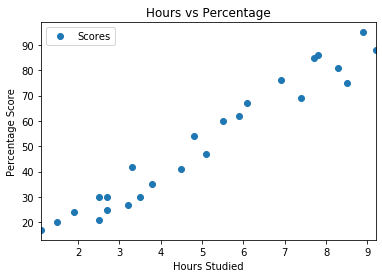

In [6]:
#Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

It is observed that as the number of hours increases scores also increases

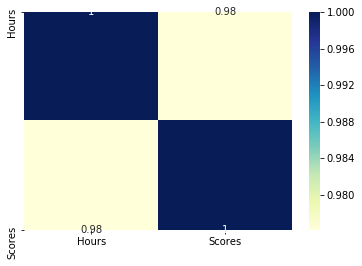

In [7]:
sns.heatmap(student_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Step 4: Linear Regression Model

Preparing the data and split it in test data

In [8]:
#Splitting training and testing data
from sklearn.model_selection import train_test_split
x=student_data.iloc[:,:-1].values
y=student_data.iloc[:,1].values
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.80,test_size=0.20,random_state=0)

### Training the model

In [9]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predict= linearRegressor.predict(x_train)

### Training the Algorithm

spliting of our data into training and testing sets is done, now it's time to train our algorithm.

In [10]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

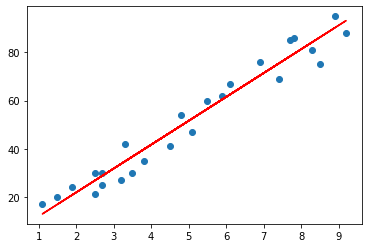

In [11]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,'r');
plt.show()

### Checking the accuracy scores for training and test set

In [12]:
print('Test Score')
print(regressor.score(x_test, y_test))
print('Training Score')
print(regressor.score(x_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211553


### Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
#Let's predict the score for 9.25 hours
print('Score of student who studied for 9.25 hours a dat', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [93.69173249]


### Evaluation of the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metric

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


## Conclusion

Predicted (test-data) score for student who studied for 9.25 hours/day will be 93.69 %.